In [573]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import numpy as np
from pathlib import Path  # python3 only
import math,datetime
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
state = 'Texas'
keyword = 'transgender'
year = str(2021)
currentYear = datetime.datetime.now().year


In [574]:
keyWords = ['China','black people','gay','immigrant','muslim','transgender']

No handles with labels found to put in legend.


ValueError: Shape of passed values is (12, 6), indices imply (6, 6)

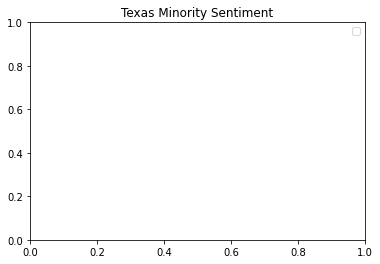

In [575]:
averageSentKeyword = {}
for keyword in keyWords:
    yearList = []
    averageSentimentOverTime = []
    json_folder = 'Keyword State'
    file_dir = Path.cwd()
    file_path = os.path.join(file_dir, json_folder, (((state) + " on the term " + keyword +'.json')))
    shape_dir = os.path.join(file_dir, 'Shapes', 'United States','USA_Counties.shx')
    # Okay turn the dictionary into a dataframe where one column is filled with keys, and the other column is the first value in the dictionary
    f = open(file_path, 'r')
    state_dict = json.load(f)
    stateDF = pd.DataFrame.from_dict(state_dict, orient='index')
    stateDF.reset_index(inplace=True)
    # stateDF = stateDF[[0,1,2]]
    stateDF.rename(columns={'index': 'County', 0 :'# of Tweets',1:'score',2:'Time'}, inplace=True)
    timeDF = pd.json_normalize(stateDF['Time'])
    stateDF.drop('Time',axis = 1,inplace= True)
    maxCount = timeDF[list(timeDF.filter(regex=('count')))].max().max()
    for year in range(2006,currentYear+1):
        year = str(year)
        if(len(list(timeDF.filter(regex=year)))>0):
            
            slicetimeDF = timeDF[list(timeDF.filter(regex=('County|' + year+'.comp|' + year+'.count')))]
            stateDF = pd.concat([stateDF['County'], slicetimeDF], axis=1)
            stateDF.rename(columns= {stateDF.columns[1]:'# of Tweets',stateDF.columns[2]:'score'}, inplace=True)
            json_folder = 'Keyword State'
            file_dir = Path.cwd()
            file_path = os.path.join(file_dir, json_folder, (((state) + " on the term " + keyword +'.json')))

            # Okay turn the dictionary into a dataframe where one column is filled with keys, and the other column is the first value in the dictionary
            f = open(file_path, 'r')
            score = []
            j=0

            #-------------------------------------
            #-------------------------------------
            # AVERAGE SENT. AND TOTAL POP.
            # get the sum of all values in a column
            totalTweets = stateDF.iloc[:, 1].sum()
            averageSentiment = 0
            k=0
            for score in stateDF['score']:
                if(math.isnan(score)==False):
                    # multiply all values in the score column by the corresponding value in the population column
                    averageSentiment += score * stateDF.iat[k,1]
                k+=1
            averageSentiment=averageSentiment/totalTweets
            yearList.append(int(year))

            averageSentimentOverTime.append([averageSentiment,int(year)])
    # averageSentimentOverTime = scaler.fit_transform(averageSentimentOverTime)
    averageSentKeyword[keyword] = (averageSentimentOverTime)
    
    a, b = zip(*averageSentimentOverTime)

    # plt.plot(b,a,label = keyword)

# np.vstack(averageSentimentOverTime,yearList)

plt.title('Texas Minority Sentiment')

plt.legend()

# print(list(averageSentKeyword.values())[0])
# print(scaler.fit_transform(list(averageSentKeyword.values())[0]))
SentimentYear = {}
keys = averageSentKeyword.keys()

for i in range(len(averageSentKeyword.values())):
    # averageSentKeyword.values()[i]
    sentiment, year = zip(*list(averageSentKeyword.values())[i])
    for j in range(len(year)):
        if year[j] in SentimentYear:
            SentimentYear[year[j]].append(sentiment[j])
        else:
            SentimentYear[year[j]] = [sentiment[j]]
            # Sentiment year is the sorted matrix which is passed through the normalizign function
            # The columns are a measure of the given year
            # The rows are the different keywords
df = pd.DataFrame(SentimentYear,index=keys)
normalizedSentiment =  scaler.fit_transform(list(SentimentYear.values()))
NormalizedData =pd.DataFrame(normalizedSentiment,index=keys)
remappedData = []
print(len(NormalizedData.columns))
print(NormalizedData)
for i in range(len(NormalizedData.columns)):
    print(i)
    testData = NormalizedData[list(keys)[i]].values.tolist()
    print(a)
    # a = (zip(*testData))
    a=list(a)
    # a= np.column_stack((a,yearList)).tolist()
    # Merge the list "a" and the liat 'yearList' as if they were two columns in a matrix
    # "a" is a list of n-arrays (each array is a data row), "yearList" is a list of integers

    remappedData.append(list(a))
print(remappedData[3])
for i in range(len(remappedData)):

    plt.plot(yearList,remappedData[i],label = i)
